# Linear Regression(Multi Features) with scikit
<a href="#https://datagy.io/python-sklearn-linear-regression/">tut Followed</a><br>
<a href="https://raw.githubusercontent.com/datagy/data/main/insurance.csv"> Data set (You can directly load this with pandas)</a><br>


In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.corr() #Correlation high age -> charges

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## Visualization
## Pairwise Plot of the Data
A pairwise plot shows the relationship between pairs of variables.<br>
It helps identify relations which the corr() cannot describe

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

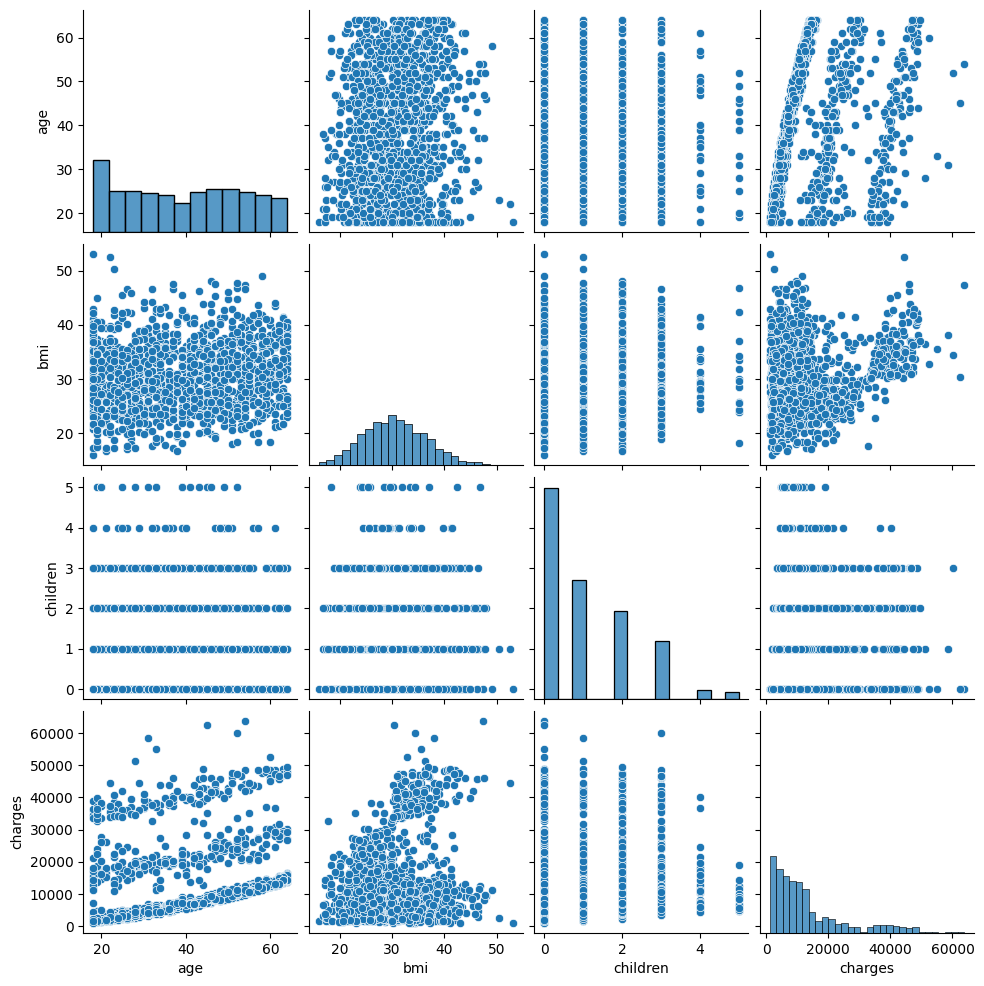

In [10]:
sns.pairplot(df)

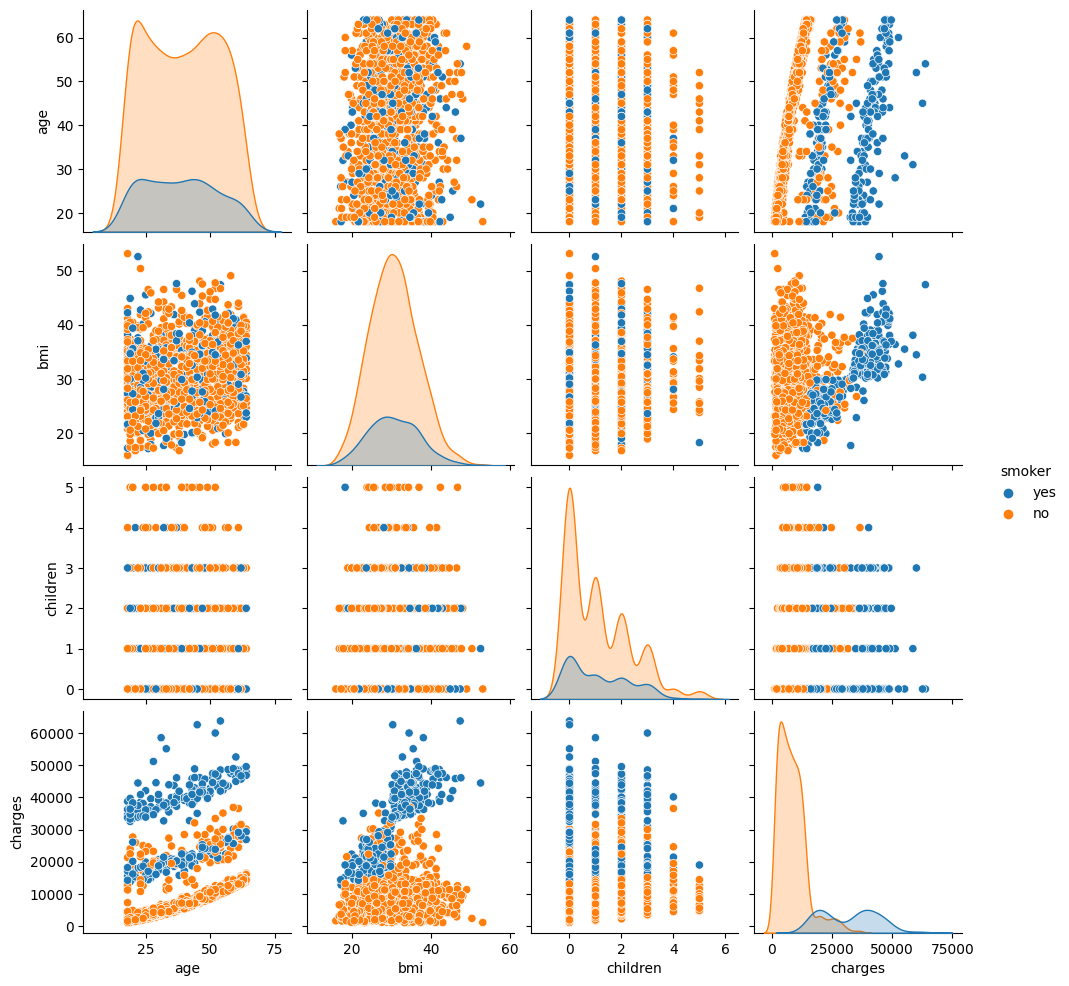

In [11]:
sns.pairplot(df,hue="smoker") #output show there is a clear diff b/w smoker and non smoker with the charge

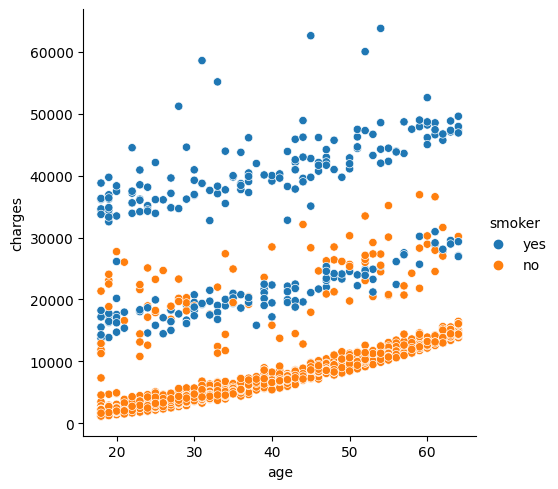

In [12]:
sns.relplot(data=df,x="age",y="charges",hue="smoker")

In [13]:
df["smoker"] = df["smoker"].map({"yes":1,"no":0})

In [14]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061


In [69]:
x = df[["age","bmi","smoker"]]
y = df["charges"]

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [71]:
from sklearn.linear_model import LinearRegression

In [119]:
multi_model = LinearRegression()

In [125]:
multi_model.fit(x_train.values.reshape(-1, len(["age","bmi","smoker"])),y_train.values) #  len(["age","bmi","smoker"])=3

LinearRegression()

In [126]:
y_pred = multi_model.predict(x_test.values)

In [127]:
from sklearn import metrics
import numpy as np
print(f"Intercept - > {multi_model.intercept_}")
print(f"coefficent - > {multi_model.coef_}")
print(f"Root mean square Value - > {np.sqrt(metrics.mean_squared_error(y_test,y_pred,squared=False))}") # this has to be low
print(f"R2 square - > {metrics.r2_score(y_test,y_pred)}")

Intercept - > -11807.044961054678
coefficent - > [  257.59903748   330.8852981  23708.1121861 ]
Root mean square Value - > 75.0887143752067
R2 square - > 0.7665404008050806


### Lets Create a prediction function
$ y = \Beta_{1} x_{1i}+\Beta x_{2i}+\Beta_{3} x_{3i} + \Beta$<br>
$\Beta_{0} = y_interecept$<br>
$\Beta_{i} = coefficients$

In [128]:
y_intercept = multi_model.intercept_
coefficients = multi_model.coef_
def predict(age:int,bmi:float,smoker:str)->float:
    # smoker = 1 if smoker.lower() =="yes" else 0
    return (age * coefficients[0]) + (bmi * coefficients[1]) + (smoker * coefficients[2]) + y_intercept
    

In [129]:
## sample prediction
predict(51,36.67,0)

13464.069831933262

The plot is going to be in 4d so cant represent it<br>
for 3d plots, ie:2 feauters refer <a href="https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python">HERE</a>

In [134]:
x_train.values.reshape(-1, len(["age","bmi","smoker"])) == x_train.values

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])